<h1>Wrangle and Analyze Data<h1>

In [2]:
#import the library 
import pandas as pd
import numpy as np
import requests
import tweepy
import matplotlib.pyplot as plt


<h2>data gathering <h2>

In [3]:
#get the tweets archeve locally 
tweet_archeve = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')
#get the tweets id from URL and save it in tweet_id column 
tweet_archeve.tweet_id=tweet_archeve.expanded_urls.str.extract('(\d{18})')


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [4]:
#set the tokens for twitter api
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), # Parse the result to Json Object
                 wait_on_rate_limit = True, # Automatically wait for rate limits to replenish
                 wait_on_rate_limit_notify = True)


In [5]:
#list for storing the pulled tweets from twitter 
tweet_list = []
#loop into every tweet id in tweet_acheve
for tweet_id in tweet_archeve.tweet_id:
    try:
        tweet = api.get_status(tweet_id)
        favorites_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        tweet_list.append({'tweet_id':int(tweet_id),'favorites_count': int(favorites_count),'retweet_count': int(retweet_count)})
    
    except Exception as e:
        print(e)

[{'code': 8, 'message': 'No data available for specified ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 8, 'message': 'No data available for specified ID.'}]
[{'code': 8, 'message': 'No data available for specified ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 8, 'message': 'No data available for specified ID.'}]
[{'code': 8, 'message': 'No data available for specified ID.'}]
[{'code': 8, 'message': 'No data available for specified ID.'}]
[{'code': 8, 'message': 'No data available for specified ID.'}]
[{'code': 8, 'message': 'No data available for specified ID.'}]
[{'code': 8, 'message': 'No data available for specified ID.'}]
[{'code': 8, 'message': 'No data available for specified ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 8, 'message': 'No data available for specified ID.'}]
[{'code': 8, 'message': 'No data available for specified ID.'}]
[{'code': 8, 'message': 'No data available for speci

In [6]:
#save the tweet list in dataframe called tweets
tweets = pd.DataFrame(tweet_list)

In [7]:
#get the image_prediction tweets using URL 
response= requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_prediction.tsv',mode='wb')as file:
    file.write(response.content)
image_prediction=pd.read_csv('image_prediction.tsv',delimiter='\t')

<h2>data assesing <h2>

In [10]:
#show the head and information of first dataframe 
tweet_archeve.info()
tweet_archeve.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2190 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
#show the head and information of second dataframe 
tweets.info()
tweets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 3 columns):
favorites_count    2179 non-null int64
retweet_count      2179 non-null int64
tweet_id           2179 non-null int64
dtypes: int64(3)
memory usage: 51.1 KB


,favorites_count,retweet_count,tweet_id
0,37900,8278,892420643555336193
1,32558,6115,892177421306343426
2,24518,4051,891815181378084864
3,41256,8421,891689557279858688
4,39427,9120,891327558926688256


In [12]:
#show the head and information of third dataframe 
image_prediction.info()
image_prediction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


quality : 

1- in tweet_archeve, the column tweet_id has wrong values.


2-tweet_archeve has retweeted tweets which we don't want them 


3-in tweet_archeve, columns 'doggo','floofer', 'pupper' and 'puppo' should be in one column.


4-in image_prediction there is no column for most confedence breed of dogs


5-in tweet_archeve columns in_reply_to_status_id and in_reply_to_user_id have lots of missing data.


6-we only want the tweet with images 

7-there are missing tweets since the tweets in tweet_archeve are 2356 and in tweets are 2190 and in image_prediction are 2075

8-wrong datatype in column timestamp in tweet_archeve.


Tidiness :

1- tweet_archeve,image_prediction and tweets_interaction should be in one dataframe 
2-we should delet columns 'doggo','floofer', 'pupper' and 'puppo' after make it in one column
3-we should delet columns in_reply_to_status_id and in_reply_to_user_id after deleting replay tweets
4-we should delet columns 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' after deleting retweets tweets



<h2> data cleaning <h2>

In [184]:
#first make copy of every dataframe

tweet_archeve_copy = tweet_archeve.copy()
tweets_copy = tweets.copy()
image_prediction_copy = image_prediction.copy()

In [185]:
#delete the non-values in tweet_archeve_copy
tweet_archeve_copy=tweet_archeve_copy[tweet_archeve_copy["tweet_id"].notnull()] 
tweet_archeve_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2190 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2190 non-null object
source                        2190 non-null object
text                          2190 non-null object
retweeted_status_id           167 non-null float64
retweeted_status_user_id      167 non-null float64
retweeted_status_timestamp    167 non-null object
expanded_urls                 2190 non-null object
rating_numerator              2190 non-null int64
rating_denominator            2190 non-null int64
name                          2190 non-null object
doggo                         2190 non-null object
floofer                       2190 non-null object
pupper                        2190 non-null object
puppo                         2190 non-null object
dtypes: float64(4), int64(2), o

As I mentioned in the second quality issus, i deleted the retweeted tweets 

In [186]:
tweet_archeve_copy=tweet_archeve_copy[tweet_archeve_copy["retweeted_status_id"].isnull()] 
tweet_archeve_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2023 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2023 non-null object
source                        2023 non-null object
text                          2023 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2023 non-null object
rating_numerator              2023 non-null int64
rating_denominator            2023 non-null int64
name                          2023 non-null object
doggo                         2023 non-null object
floofer                       2023 non-null object
pupper                        2023 non-null object
puppo                         2023 non-null object
dtypes: float64(4), int64(2), object(

now after i deleted the retweeted tweets there is no use of the folowing columns: 'retweeted_status_id','retweeted_status_user_id' and 'retweeted_status_timestamp'


In [187]:
tweet_archeve_copy = tweet_archeve_copy.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)
tweet_archeve_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2023 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2023 non-null object
source                   2023 non-null object
text                     2023 non-null object
expanded_urls            2023 non-null object
rating_numerator         2023 non-null int64
rating_denominator       2023 non-null int64
name                     2023 non-null object
doggo                    2023 non-null object
floofer                  2023 non-null object
pupper                   2023 non-null object
puppo                    2023 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 237.1+ KB


in the third quality issu, in the columns 'doggo','floofer', 'pupper' and 'puppo' the null values have 'none' whoch is wrong so i replace it with null.

In [188]:
#first replace the None values with empty values
tweet_archeve_copy= tweet_archeve_copy.replace('None', '')
tweet_archeve_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


now i join thos columns into one called  'dog_s' 

In [189]:
tweet_archeve_copy['dog_s'] = tweet_archeve_copy.doggo.str.cat(tweet_archeve_copy.floofer).str.cat(tweet_archeve_copy.pupper).str.cat(tweet_archeve_copy.puppo)
tweet_archeve_copy.head()
#note :
#this code was taken from this source:
#https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_s
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,


In [190]:
#now replace the empty values with NaN using numpy 
tweet_archeve_copy= tweet_archeve_copy.replace('', np.nan)

#note: this code was taken from this source :https://stackoverflow.com/questions/6016744/nan-in-python-and-validity-checking

now i deleted the  columns 'doggo','floofer', 'pupper' and 'puppo'

In [191]:
tweet_archeve_copy = tweet_archeve_copy.drop(['doggo','floofer', 'pupper' , 'puppo'],axis=1)
tweet_archeve_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_s
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


as i menshed in 5th quality issue i deleted the replay tweets 

In [192]:
tweet_archeve_copy=tweet_archeve_copy[tweet_archeve_copy["in_reply_to_status_id"].isnull()] 


now there is no use of in_reply_to_status_id and in_reply_to_user_id so i deleted 

In [193]:
tweet_archeve_copy = tweet_archeve_copy.drop(['in_reply_to_status_id' , 'in_reply_to_user_id'], axis=1)
tweet_archeve_copy.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2000 non-null object
timestamp             2000 non-null object
source                2000 non-null object
text                  2000 non-null object
expanded_urls         2000 non-null object
rating_numerator      2000 non-null int64
rating_denominator    2000 non-null int64
name                  1448 non-null object
dog_s                 308 non-null object
dtypes: int64(2), object(7)
memory usage: 156.2+ KB


now i fixed the number 4 

In [194]:
breed = []
confidence = []

def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        confidence.append(0)
      

image_prediction_copy.apply(breed_confidence, axis=1)
image_prediction_copy['breed'] = breed
image_prediction_copy['confidence'] = confidence
image_prediction_copy.head()


#note this code was taken from this source : http://empierce.com/2017/11/14/wrangling-weratedogs/ 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [195]:
#merg the three dataframes to one dataframe called data
data= pd.merge(left=tweet_archeve_copy, right=image_prediction_copy, left_index=True, right_index=True, how='left')
data = pd.merge(left=data, right=tweets_copy, left_index=True, right_index=True, how='left')

In [196]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id_x            2000 non-null object
timestamp             2000 non-null object
source                2000 non-null object
text                  2000 non-null object
expanded_urls         2000 non-null object
rating_numerator      2000 non-null int64
rating_denominator    2000 non-null int64
name                  1448 non-null object
dog_s                 308 non-null object
tweet_id_y            1726 non-null float64
jpg_url               1726 non-null object
img_num               1726 non-null float64
p1                    1726 non-null object
p1_conf               1726 non-null float64
p1_dog                1726 non-null object
p2                    1726 non-null object
p2_conf               1726 non-null float64
p2_dog                1726 non-null object
p3                    1726 non-null object
p3_conf               1726 non-null float64
p3_dog                1726 non-

,tweet_id_x,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_s,tweet_id_y,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence,favorites_count,retweet_count,tweet_id
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,6.660209e+17,...,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074,37900.0,8278.0,8.924206e+17
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6.660293e+17,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826,32558.0,6115.0,8.921774e+17
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,6.660334e+17,...,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461,24518.0,4051.0,8.918152e+17
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,6.660442e+17,...,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143,41256.0,8421.0,8.916896e+17
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,6.660492e+17,...,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311,39427.0,9120.0,8.913276e+17


now delet the tweets without image 

In [197]:
data = data[data['jpg_url'].notnull()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 2074
Data columns (total 26 columns):
tweet_id_x            1726 non-null object
timestamp             1726 non-null object
source                1726 non-null object
text                  1726 non-null object
expanded_urls         1726 non-null object
rating_numerator      1726 non-null int64
rating_denominator    1726 non-null int64
name                  1264 non-null object
dog_s                 308 non-null object
tweet_id_y            1726 non-null float64
jpg_url               1726 non-null object
img_num               1726 non-null float64
p1                    1726 non-null object
p1_conf               1726 non-null float64
p1_dog                1726 non-null object
p2                    1726 non-null object
p2_conf               1726 non-null float64
p2_dog                1726 non-null object
p3                    1726 non-null object
p3_conf               1726 non-null float64
p3_dog                1726 non-

change the datatype of timestamp column from object to datetime

In [198]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 2074
Data columns (total 26 columns):
tweet_id_x            1726 non-null object
timestamp             1726 non-null datetime64[ns]
source                1726 non-null object
text                  1726 non-null object
expanded_urls         1726 non-null object
rating_numerator      1726 non-null int64
rating_denominator    1726 non-null int64
name                  1264 non-null object
dog_s                 308 non-null object
tweet_id_y            1726 non-null float64
jpg_url               1726 non-null object
img_num               1726 non-null float64
p1                    1726 non-null object
p1_conf               1726 non-null float64
p1_dog                1726 non-null object
p2                    1726 non-null object
p2_conf               1726 non-null float64
p2_dog                1726 non-null object
p3                    1726 non-null object
p3_conf               1726 non-null float64
p3_dog                1

In [216]:
data.to_csv('twitter_archive_master.csv', index=False )


<h2> data analysing <h2>

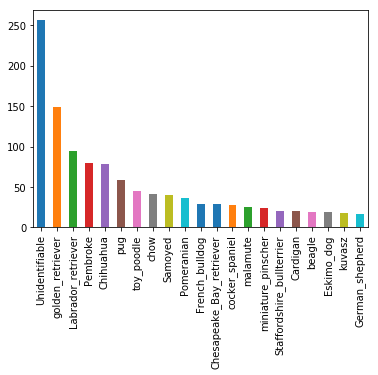

In [199]:
#plot bar graph of the number of dog breed that are more than 15 
t_b = data.groupby('breed').filter(lambda x: len(x) > 15)
t_b['breed'].value_counts().plot(kind = 'bar')


the tweets that detected as not dog is taking the lead over 250 tweets , the most frequent dog breed is 'golden_retriever'

In [200]:
#set the time as index 
data.set_index(data['timestamp'], inplace=True)


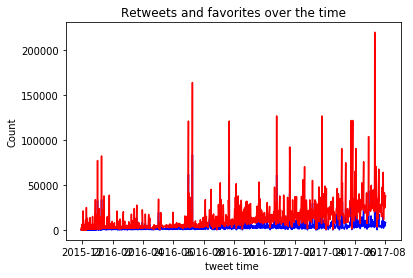

In [201]:
#plot line graph of retweets and faiverets over the time from 2015 
plt.plot( data['retweet_count'] , color = 'b')
plt.plot(data['favorites_count'], color = 'r')
plt.xlabel('tweet time ')
plt.ylabel('Count')
plt.title('Retweets and favorites over the time')

plt.show()


as we can see in the apove graph that the faiverets are much higer than retweets , and the retweets are growing over the time.

In [208]:
dog_stage = data[data['dog_s'].notnull()]


Text(0.5,1,'Dog stages')

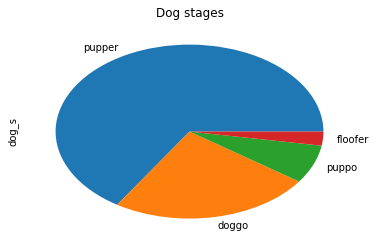

In [215]:
#plot pie graph of dogs stages 
dog_stage[dog_stage['dog_s'].notnull()]['dog_s'].value_counts().plot(kind = 'pie')
plt.title('Dog stages')

as we can see in the apove graph that dog stage pupper is the most common stage, and doggo become the second 